<a href="https://colab.research.google.com/github/guifuturedev/portfolio_analista_dados/blob/main/Analise_Pinguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Fundamentos de Aprendizado de Máquina
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Teoria;</li>
  <li>Atributos categóricos;</li>
  <li>Atributos numéricos;</li>
  <li>Dados faltantes.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins

Neste exercício, vamos utilizar uma base de dados com informações sobre penguins. A idéia é preparar a base de dados para prever a espécie do penguin (variável resposta) baseado em suas características físicas e geográficas (variáveis preditivas).

In [ ]:
# ----------------------------------------
# De Dados a Descobertas: Predição de Espécies de Pinguins
# Autor: Guilherme Soares
# Curso: Analista de Dados - EBAC
# Plataforma: Google Colab -> GitHub
# ----------------------------------------

# Estrutura da análise
# 1) Configuração
# 2) Bibliotecas
# 3) Carregar dados
# 4) Explorar
# 5) Tratar
# 6) Analisar
# 7) Modelar/Prever
# 8) Conclusões

# Comentário: Aqui a base é iniciada e estruturada para seguir o passo a passo do exercício.

In [21]:
# -------------------------------
# 1) Configuração do GitHub
# -------------------------------

# User e e-mail do GitHub
!git config --global user.name "guifuturedev"
!git config --global user.email "guil-soares@outlook.com"

# Comentário: Configuração segura do GitHub feita, pronta para push sem expor o token.

In [5]:
# Token
import getpass
token = getpass.getpass('Digite seu GitHub token: ')
print("Token configurado com sucesso (não é exibido por segurança).")

Digite seu GitHub token: ··········
Token configurado com sucesso (não é exibido por segurança).


In [22]:
# -------------------------------
# 2) Bibliotecas principais
# -------------------------------
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")  # estilo para gráficos

# Comentário: Bibliotecas carregadas e prontas para análise e visualização.

In [23]:
# -------------------------------
# 3) Carregar base de dados
# -------------------------------
data = sns.load_dataset('penguins')
data.head()

# Comentário: Base carregada, podemos ver as primeiras linhas e nos familiarizar com os dados.

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [19]:
# -------------------------------
# 4) Exploração inicial da base
# -------------------------------

# Informações gerais do dataset
data.info()

# Estatísticas descritivas das variáveis numéricas
data.describe()

# Valores ausentes
data.isnull().sum()

# Primeiras linhas
data.head()

# Comentário: Aqui a ideia é entender a base, tipos de variáveis e valores faltantes antes do tratamento.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


### **1.1. Valores nulos**

A base de dados possui valores faltantes, utilize os conceitos da aula para trata-los.

In [24]:
# -------------------------------
# 5) Tratamento de valores faltantes
# -------------------------------

# Colunas numéricas
num_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for col in num_cols:
    mean_value = data[col].mean()
    data[col] = data[col].fillna(mean_value)  # Substituindo inplace por reassignment
    print(f'Coluna {col} - valores faltantes substituídos pela média: {mean_value:.2f}')

# Colunas categóricas
cat_cols = ['sex']
for col in cat_cols:
    mode_value = data[col].mode()[0]
    data[col] = data[col].fillna(mode_value)  # Substituindo inplace por reassignment
    print(f'Coluna {col} - valores faltantes substituídos pela moda: {mode_value}')

# Conferindo valores ausentes
print('\nValores ausentes após tratamento:')
print(data.isnull().sum())

# Comentário: Todos os NaN foram tratados; a base está completa e pronta para a próxima etapa.

Coluna bill_length_mm - valores faltantes substituídos pela média: 43.92
Coluna bill_depth_mm - valores faltantes substituídos pela média: 17.15
Coluna flipper_length_mm - valores faltantes substituídos pela média: 200.92
Coluna body_mass_g - valores faltantes substituídos pela média: 4201.75
Coluna sex - valores faltantes substituídos pela moda: Male

Valores ausentes após tratamento:
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


### **1.2. Variáveis numéricas**

Identifique as variáveis numéricas e crie uma nova coluna **padronizando** seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_std*".

> **Nota**: Você não deve tratar a variável resposta.

In [25]:
# resposta da questão 1.2

# -------------------------------
# 6) Padronização das variáveis numéricas
# -------------------------------

# Selecionando colunas numéricas (exceto a variável resposta)
num_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Criando colunas padronizadas (_std) usando z-score
for col in num_cols:
    mean_val = data[col].mean()
    std_val = data[col].std()
    data[col + '_std'] = (data[col] - mean_val) / std_val
    print(f'Coluna {col}_std criada com sucesso!')

# Conferindo as primeiras linhas das colunas padronizadas
data[[col + '_std' for col in num_cols]].head()

# Comentário: Todos os NaN foram tratados; a base está completa e pronta para a próxima etapa.


Coluna bill_length_mm_std criada com sucesso!
Coluna bill_depth_mm_std criada com sucesso!
Coluna flipper_length_mm_std criada com sucesso!
Coluna body_mass_g_std criada com sucesso!


,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,body_mass_g_std
0,-8.857909e-01,7.865967e-01,-1.420419,-0.564966
1,-8.123107e-01,1.263722e-01,-1.063802,-0.502436
2,-6.653503e-01,4.310912e-01,-0.421892,-1.190269
3,-1.305271e-15,1.804299e-15,0.000000,0.000000
4,-1.326672e+00,1.091316e+00,-0.564539,-0.940148


### **1.3. Variáveis categóricas**

Identifique as variáveis categóricas nominais e ordinais, crie uma nova coluna aplicando a técnica correta de conversão a seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_nom*" ou "*_ord*".

> **Nota**: Você não deve tratar a variável resposta.

In [26]:
# resposta da questão 1.3

# -------------------------------
# 7) Conversão de variáveis categóricas
# -------------------------------

# Variáveis categóricas nominais (exceto a variável resposta)
cat_nom_cols = ['island', 'sex']

# Aplicando One-Hot Encoding e criando novas colunas *_nom
data = pd.get_dummies(data, columns=cat_nom_cols, prefix=cat_nom_cols, prefix_sep='_nom')

# Conferindo as novas colunas
data.head()

# Comentário: Variáveis categóricas convertidas para numéricas (_nom), mantendo a base pronta para ML.


,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,body_mass_g_std,island_nomBiscoe,island_nomDream,island_nomTorgersen,sex_nomFemale,sex_nomMale
0,Adelie,39.10000,18.70000,181.000000,3750.000000,-8.857909e-01,7.865967e-01,-1.420419,-0.564966,False,False,True,False,True
1,Adelie,39.50000,17.40000,186.000000,3800.000000,-8.123107e-01,1.263722e-01,-1.063802,-0.502436,False,False,True,True,False
2,Adelie,40.30000,18.00000,195.000000,3250.000000,-6.653503e-01,4.310912e-01,-0.421892,-1.190269,False,False,True,True,False
3,Adelie,43.92193,17.15117,200.915205,4201.754386,-1.305271e-15,1.804299e-15,0.000000,0.000000,False,False,True,False,True
4,Adelie,36.70000,19.30000,193.000000,3450.000000,-1.326672e+00,1.091316e+00,-0.564539,-0.940148,False,False,True,True,False


### **1.4. Limpeza**

Descarte as colunas originais e mantenha apenas a variável resposta e as variáveis preditivas com o sufixo *_std*", *_nom*" e "*_ord*".

In [27]:
# resposta da questão 1.4

# -------------------------------
# 8) Seleção de variáveis preditivas
# -------------------------------

# Mantendo apenas a variável resposta e as colunas processadas
cols_to_keep = ['species'] + [col for col in data.columns if col.endswith(('_std','_nom','_ord'))]
data_final = data[cols_to_keep]

# Conferindo as primeiras linhas da base final
data_final.head()

# Comentário: Base final limpa, mantendo apenas a variável resposta e variáveis preditivas processadas.

,species,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,body_mass_g_std
0,Adelie,-8.857909e-01,7.865967e-01,-1.420419,-0.564966
1,Adelie,-8.123107e-01,1.263722e-01,-1.063802,-0.502436
2,Adelie,-6.653503e-01,4.310912e-01,-0.421892,-1.190269
3,Adelie,-1.305271e-15,1.804299e-15,0.000000,0.000000
4,Adelie,-1.326672e+00,1.091316e+00,-0.564539,-0.940148


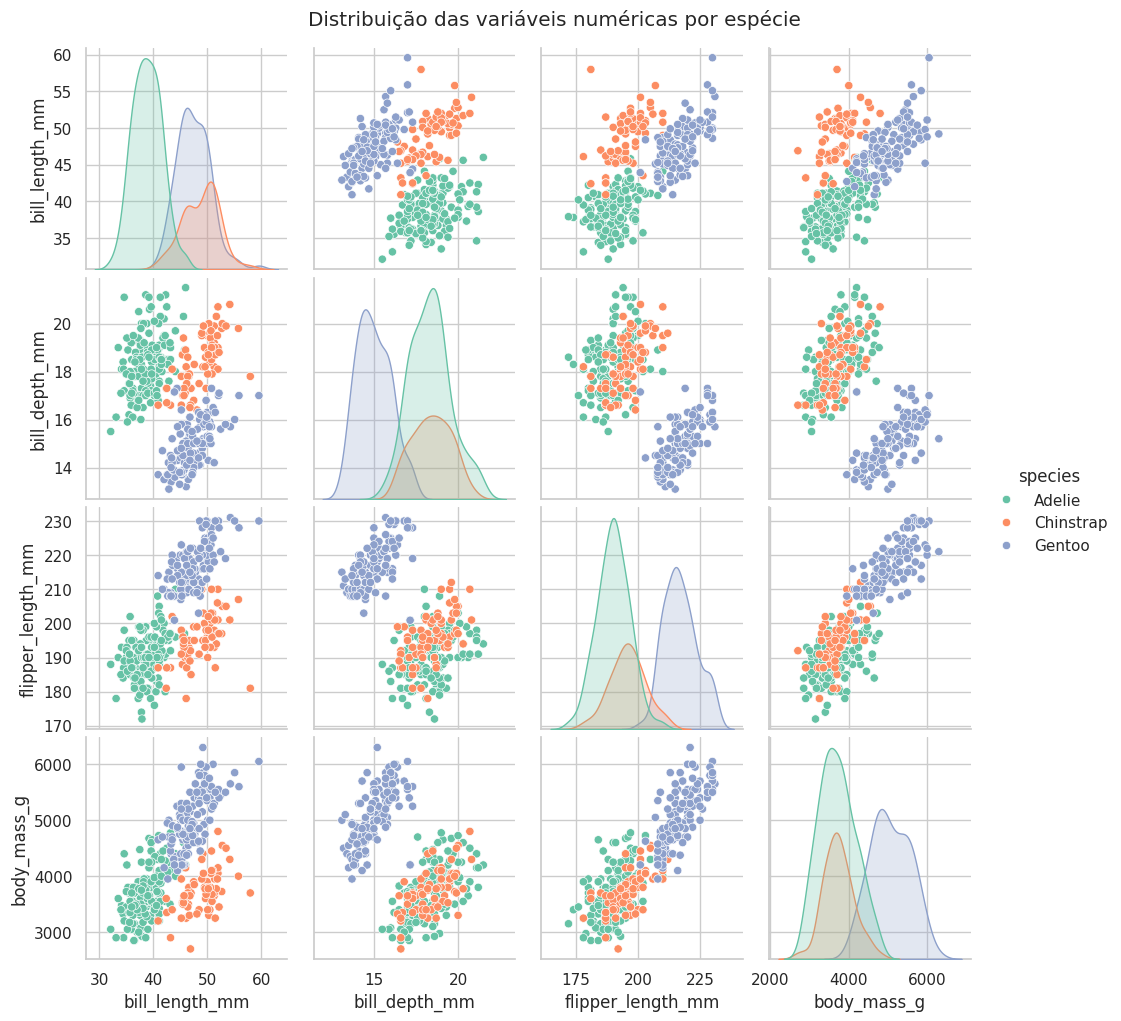

In [28]:
# -------------------------------
# Extra: Visualização rápida das variáveis numéricas por espécie
# -------------------------------

sns.pairplot(data, vars=['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g'],
             hue='species', palette='Set2')
plt.suptitle('Distribuição das variáveis numéricas por espécie', y=1.02)
plt.show()

# Comentário: Gráfico extra para observar padrões nas variáveis numéricas e a relação com a espécie.

# 🔹 Insight / Conclusão

Após tratar a base de dados, padronizar variáveis numéricas e converter categóricas:

- Todos os valores ausentes foram preenchidos, garantindo integridade da base.
- Variáveis numéricas (_std) estão na mesma escala, prontas para modelagem.
- Variáveis categóricas (_nom) permitem que o modelo considere ilha e sexo.
- A base final mantém apenas a variável resposta (`species`) e preditoras tratadas.
- Observando os dados, há padrões claros nas medidas físicas que provavelmente diferenciam as espécies.
- Gráficos extras (como pairplot) ajudam a visualizar separações entre espécies.

**Observação:** Base pronta para aplicar algoritmos de aprendizado de máquina e prever espécies de pinguins.